# Lecture 38: Power Transformer

Importing Libraries

In [21]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

Importing Dataframe

In [22]:
df=pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
print(df.shape)

(1599, 12)


Checking whether Null values are or not 

In [24]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Train Test Split

In [25]:
X=df.drop(columns='quality')
y=df.quality

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Making Hist Plots

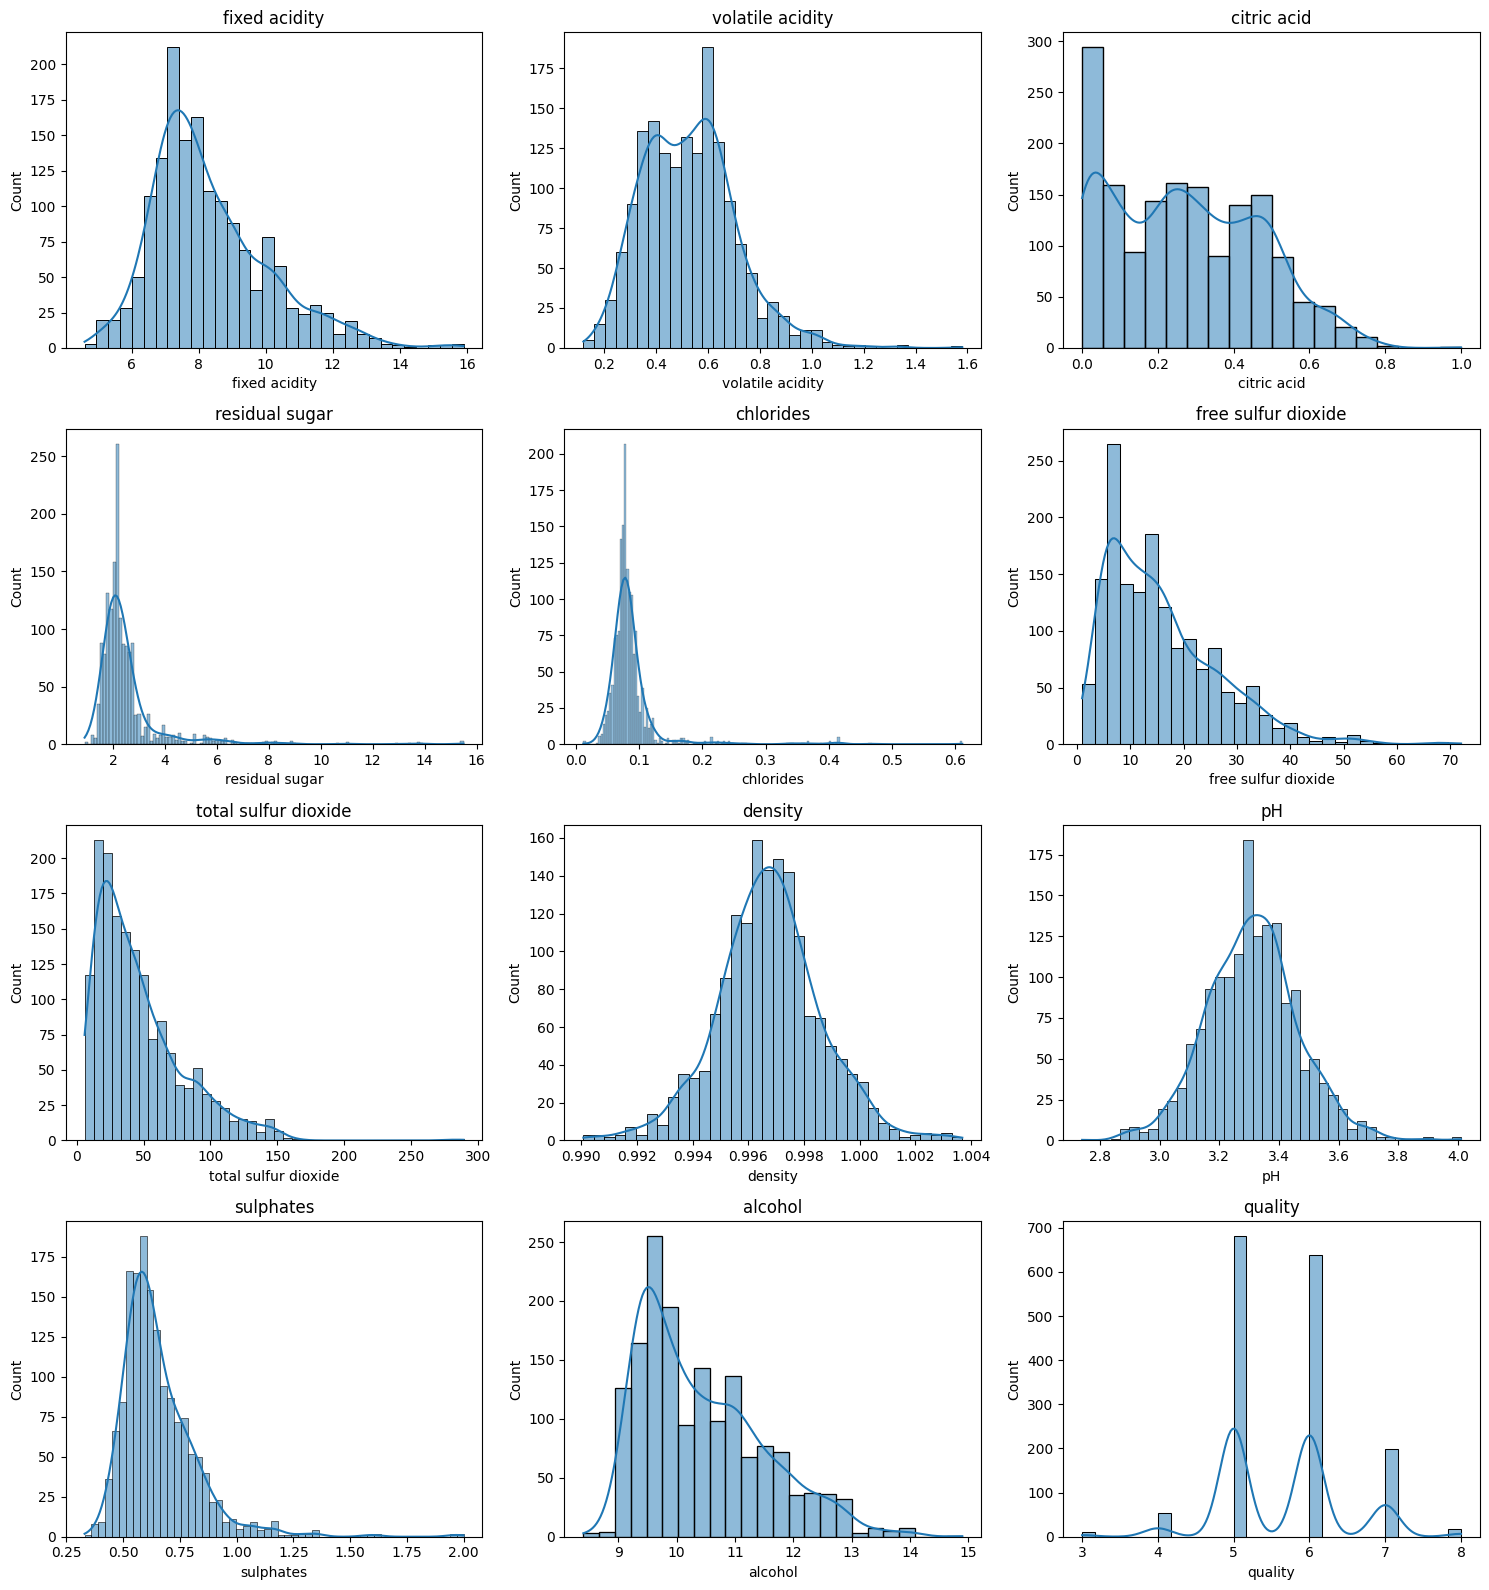

In [26]:
num_cols = df.select_dtypes(include='number').columns
cols_per_row = 3
rows = (len(num_cols) + cols_per_row - 1) // cols_per_row  # auto rows

plt.figure(figsize=(15, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df[col],kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


Making QQ Plot

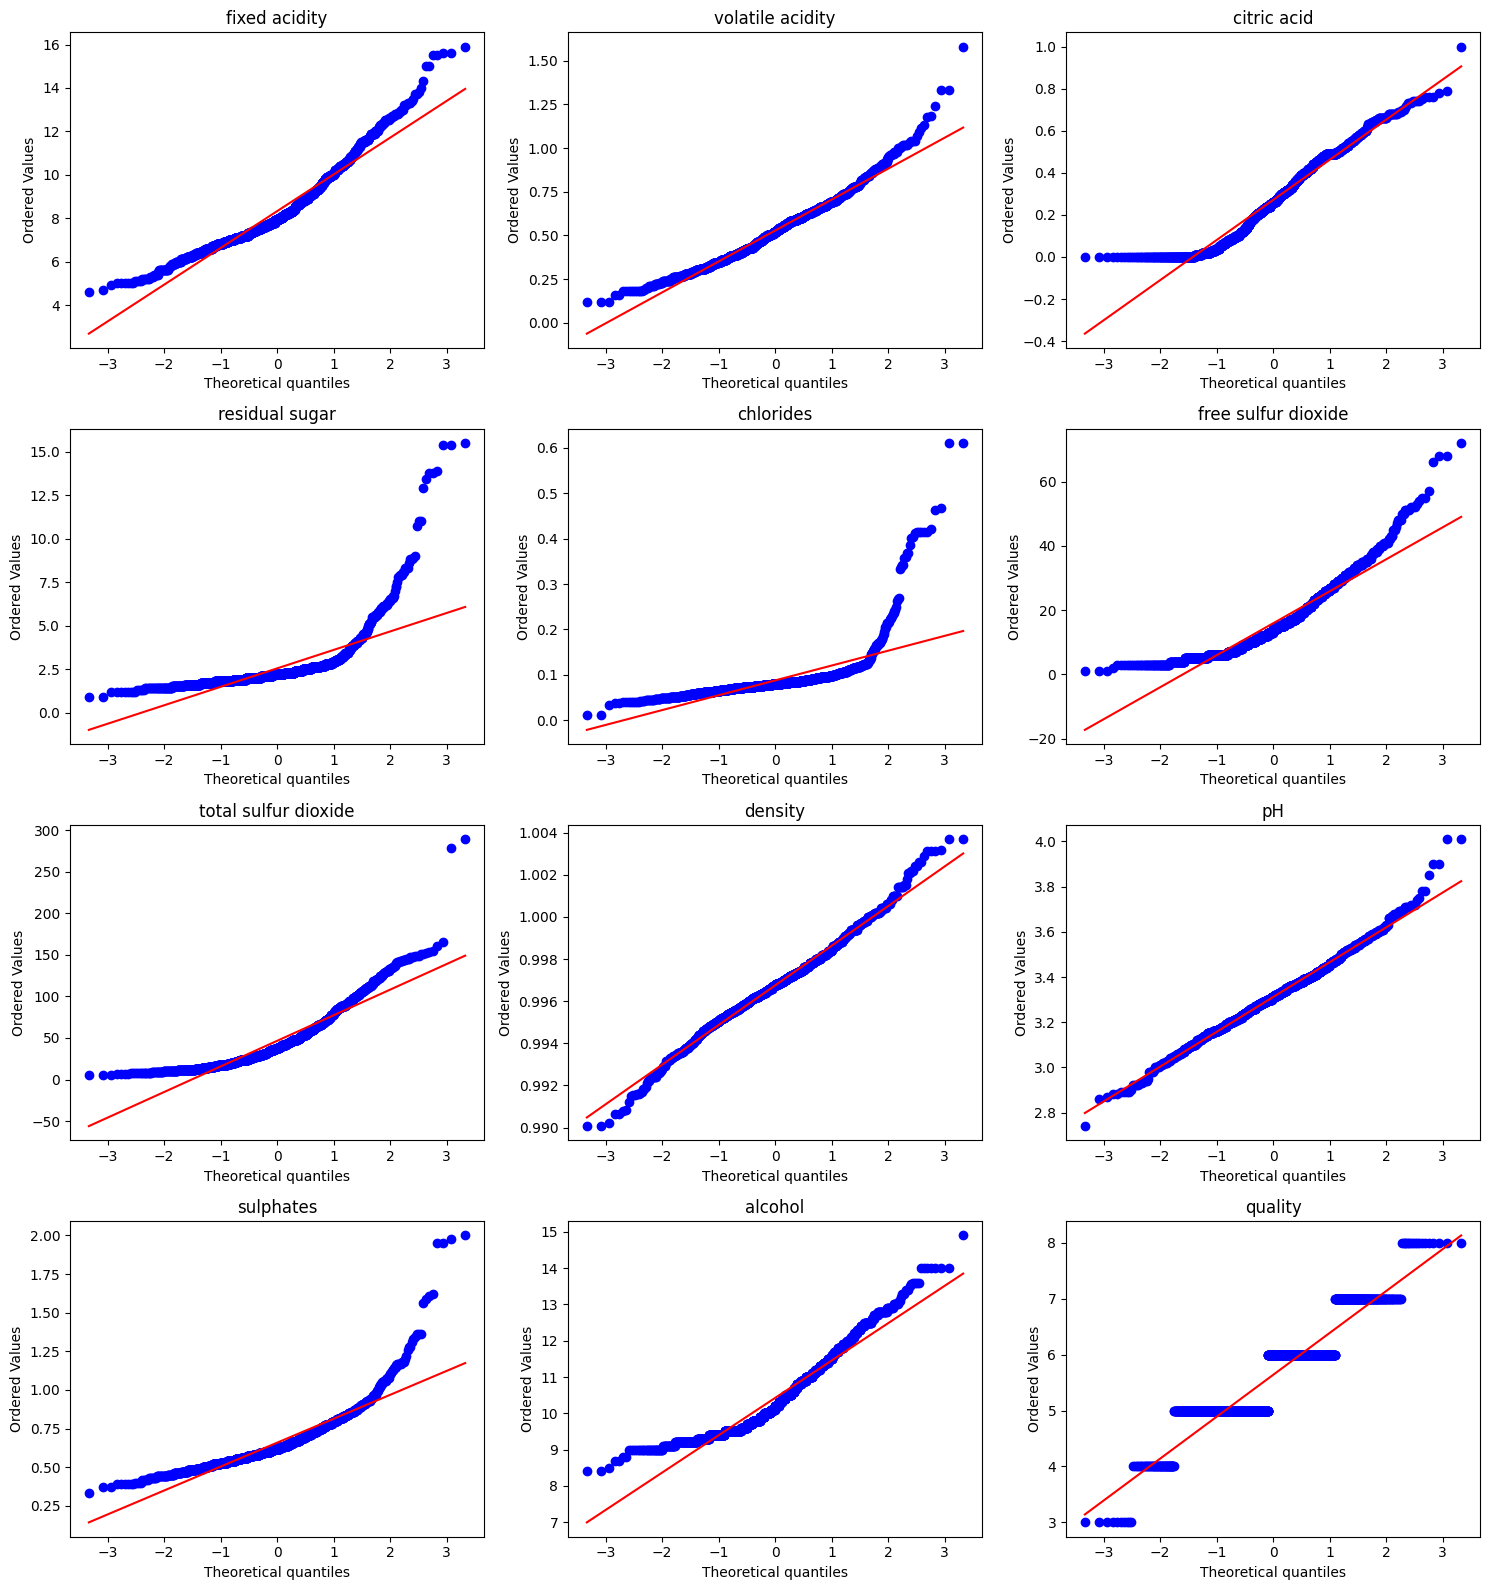

In [27]:
num_cols = df.select_dtypes(include='number').columns
cols_per_row = 3
rows = (len(num_cols) + cols_per_row - 1) // cols_per_row 

plt.figure(figsize=(15, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    stats.probplot(df[col], plot=plt)
    plt.title(col)

plt.tight_layout()
plt.show()


Checking R2 score Before Power Transformer

In [28]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print("R2 Score:", r2_score(y_test, lr_pred))


R2 Score: 0.27447697435763974


Cross checking with cross val score

In [29]:
lr = LinearRegression()
np.mean(cross_val_score(lr,X_train,y_train,scoring='r2'))

np.float64(0.35926494699928957)

Applying Box-Cox Transformer

In [30]:
box_cox=PowerTransformer(method='box-cox')

X_train_box_cox=box_cox.fit_transform(X_train+0.000001)
X_test_box_cox=box_cox.transform(X_test+0.00001)


Checking R2 score after Box-Cox Transformer

In [31]:
lr_box_cox=LinearRegression()

lr_box_cox.fit(X_train_box_cox,y_train)

lr_pred=lr_box_cox.predict(X_test_box_cox)

print("R2 Score:", r2_score(y_test, lr_pred))


R2 Score: 0.28892946860541013


Checking Lambda values chosen by Box-Cox

In [32]:
lambda_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Lambda': box_cox.lambdas_
})
lambda_df


,Feature,Lambda
0,fixed acidity,-0.607922
1,volatile acidity,0.379165
2,citric acid,0.405337
3,residual sugar,-1.221429
4,chlorides,-0.544642
5,free sulfur dioxide,0.123356
6,total sulfur dioxide,0.024398
7,density,-4.062919
8,pH,-0.148504
9,sulphates,-1.084854


Cross Val Score to double Check

In [33]:
np.mean(cross_val_score(lr_box_cox,X_train_box_cox,y_train,scoring='r2'))

np.float64(0.36850440898772585)

Applying Yeo-Johnson Transformer

In [34]:
yeo_johnson=PowerTransformer()

X_train_yeo=yeo_johnson.fit_transform(X_train)
X_test_yeo=yeo_johnson.transform(X_test)


Checking R2 score after Yeo Johnson Transformer

In [35]:
lr_yeo=LinearRegression()

lr_yeo.fit(X_train_yeo,y_train)

lr_pred=lr_yeo.predict(X_test_yeo)

print("R2 Score:", r2_score(y_test, lr_pred))


R2 Score: 0.28609630438481215


Cross Val Score to double Check

In [36]:
np.mean(cross_val_score(lr_yeo,X_train_yeo,y_train,scoring='r2'))

np.float64(0.3683295970712622)

Checking lamdba values chosen by Yeo-Johnson

In [37]:
lambda_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Lambda': yeo_johnson.lambdas_
})
lambda_df


,Feature,Lambda
0,fixed acidity,-0.806876
1,volatile acidity,-0.823472
2,citric acid,-0.295284
3,residual sugar,-2.100799
4,chlorides,-18.895761
5,free sulfur dioxide,0.042875
6,total sulfur dioxide,-0.003612
7,density,-9.207375
8,pH,-0.510353
9,sulphates,-4.086836


Converting Arrays to Dataframe

In [38]:
X_train_yeo = pd.DataFrame(X_train_yeo,columns=X_train.columns)
X_train_box_cox=pd.DataFrame(X_train_box_cox,columns=X_train.columns)

Making Hist Plot after applying Yeo-Johnson

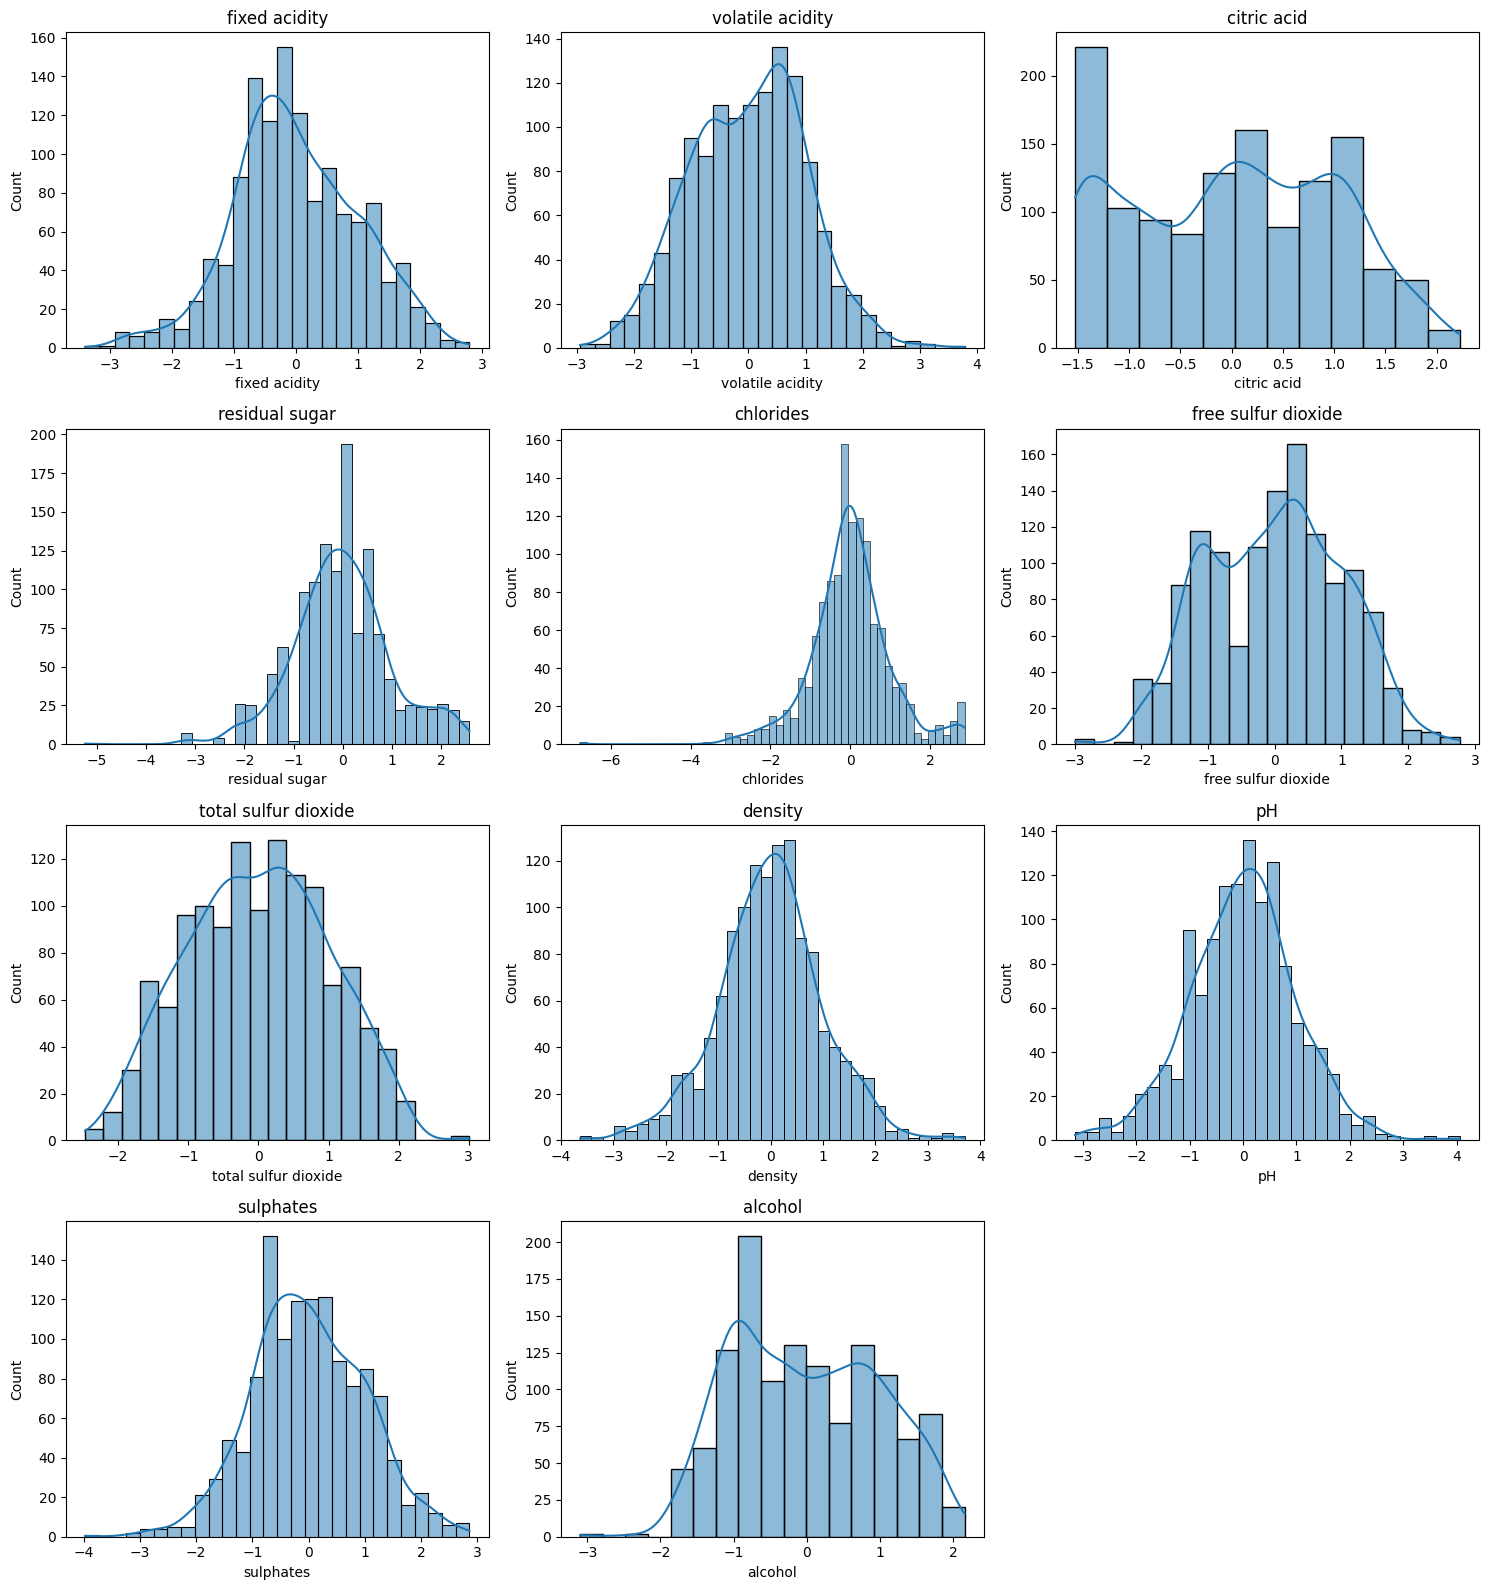

In [39]:
num_cols = X_train.select_dtypes(include='number').columns
cols_per_row = 3
rows = (len(num_cols) + cols_per_row - 1) // cols_per_row  # auto rows

plt.figure(figsize=(15, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(X_train_yeo[col],kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


After applying Box-Cox

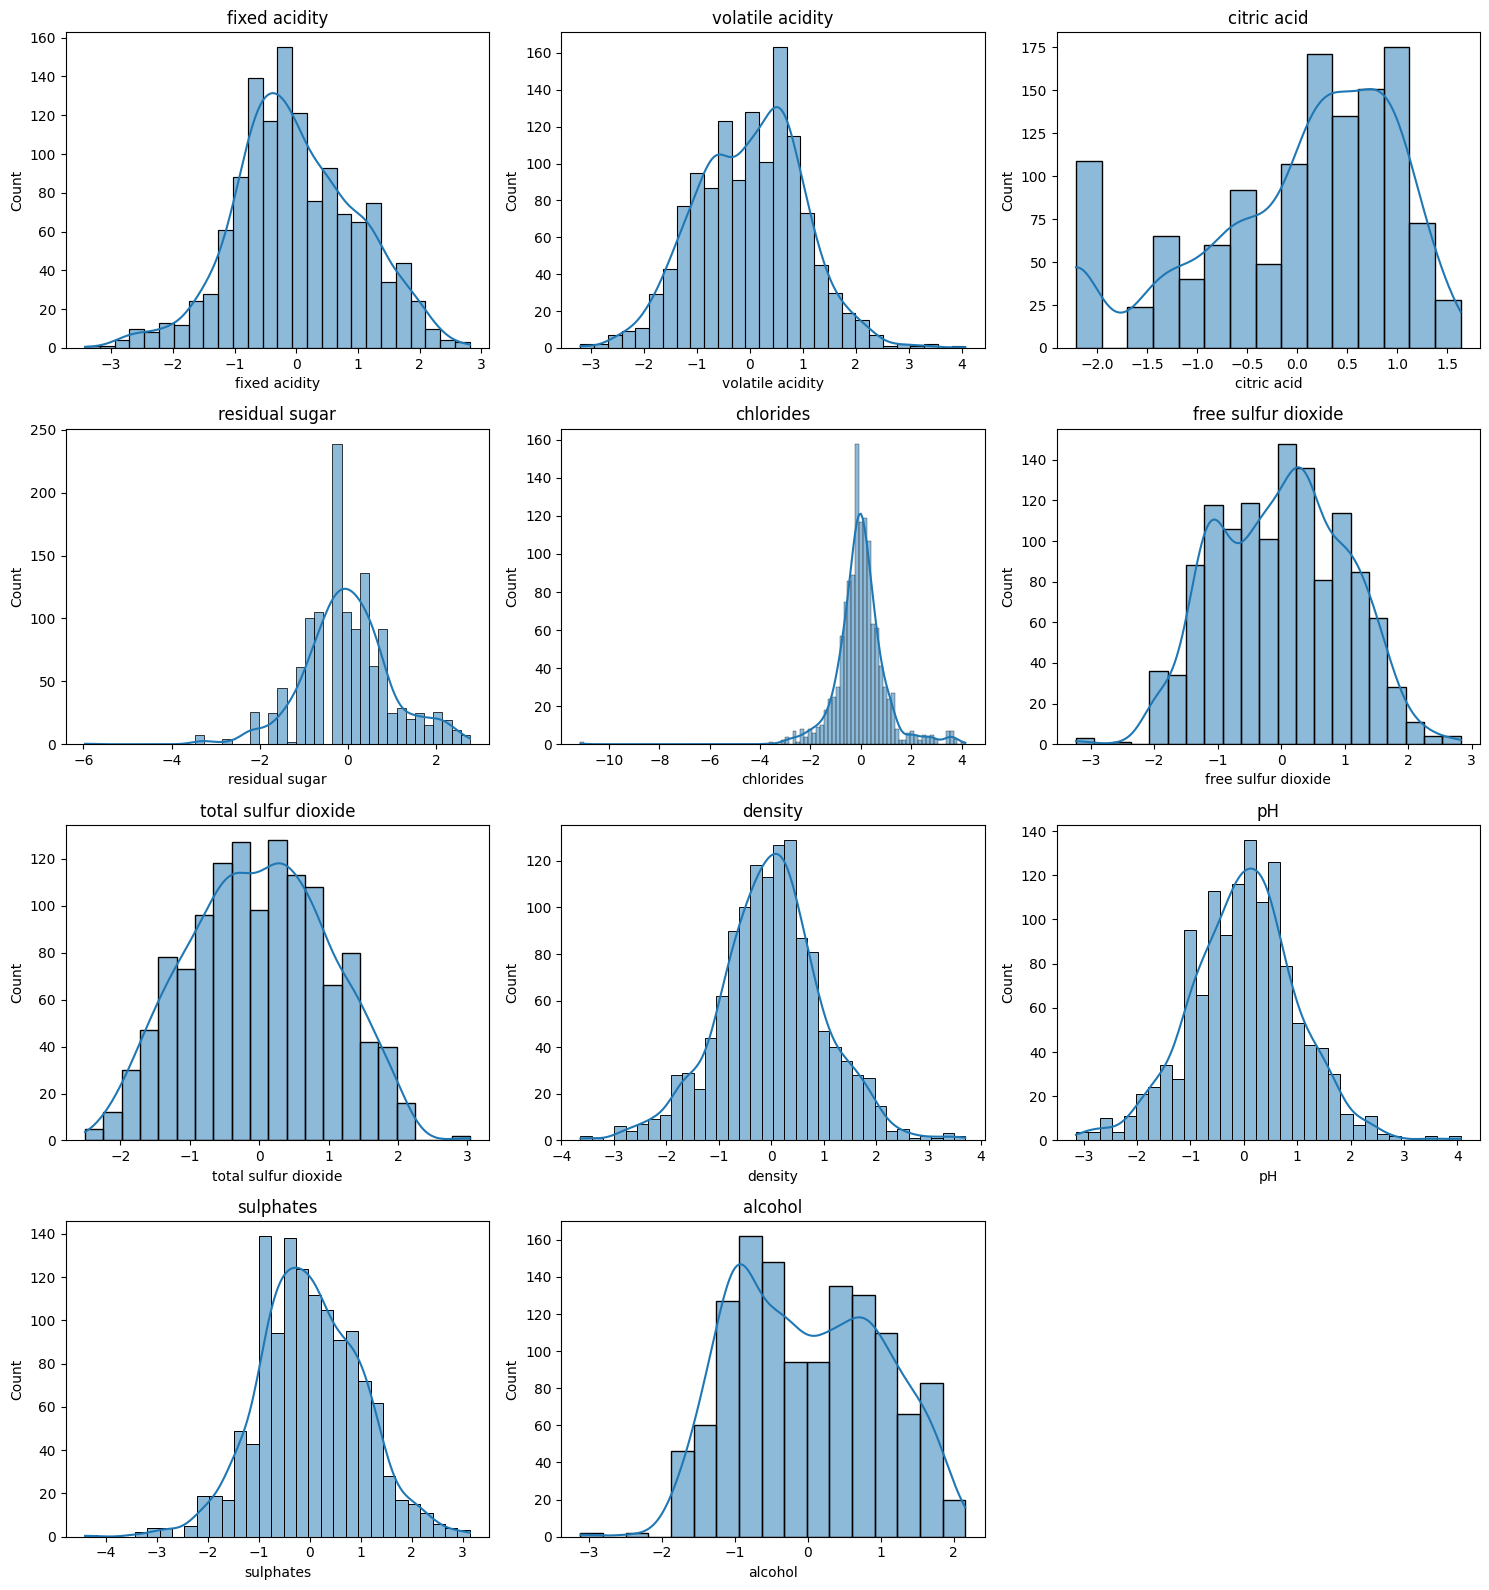

In [40]:
num_cols = X_train.select_dtypes(include='number').columns
cols_per_row = 3
rows = (len(num_cols) + cols_per_row - 1) // cols_per_row 

plt.figure(figsize=(15, 4 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(X_train_box_cox[col],kde=True)
    plt.title(col)


plt.tight_layout()
plt.show()
